In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

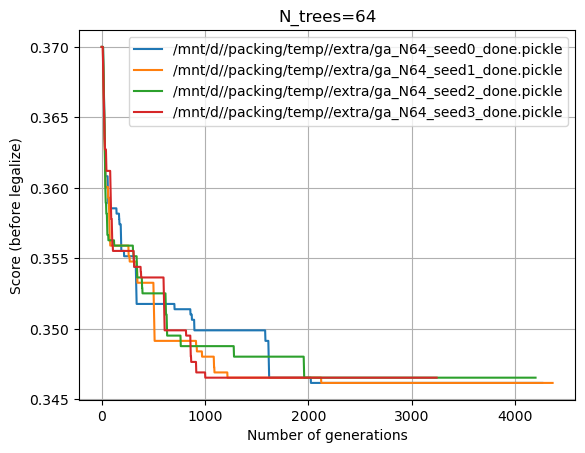

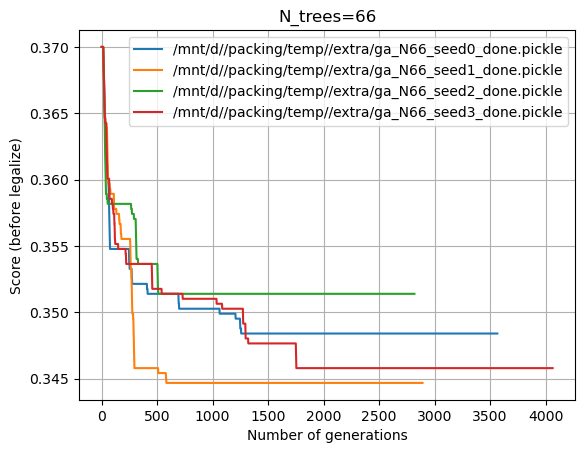

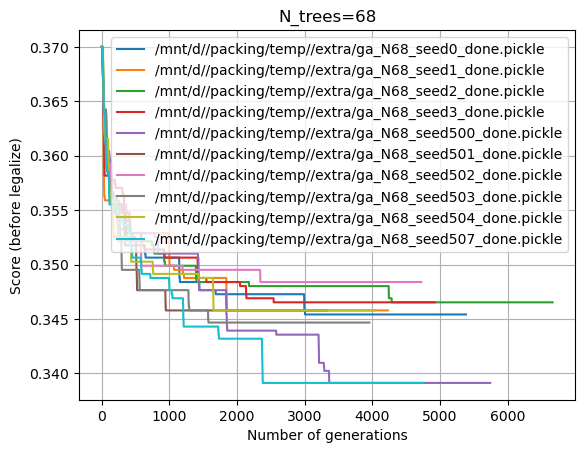

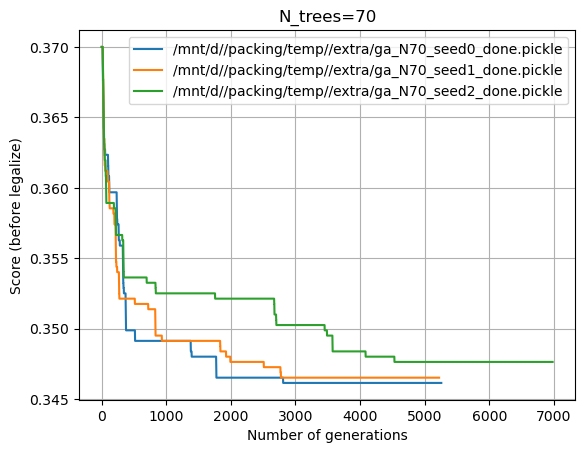

In [2]:
import numpy as np
import glob
for N_trees in np.arange(201):
    files = glob.glob(kgs.temp_dir + f'/extra/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>0:     
        plt.figure()         
        for f in files:
            dat = kgs.dill_load(f)                  
            full_mat = np.array([[x[0] for x in y.best_costs_per_generation[0]] for y in dat.ga.ga_list])
            #plt.plot(np.mean(full_mat,0))
            #plt.plot(np.std(full_mat,0)+np.mean(full_mat))
            plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=f)
        plt.title(f'N_trees={N_trees}')
        plt.legend()
        plt.xlabel('Number of generations')
        plt.ylabel('Score (before legalize)')
        plt.grid()
        plt.pause(0.001)

/mnt/d/packing/code/analysis/../core/pack_vis_sol.py:329: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


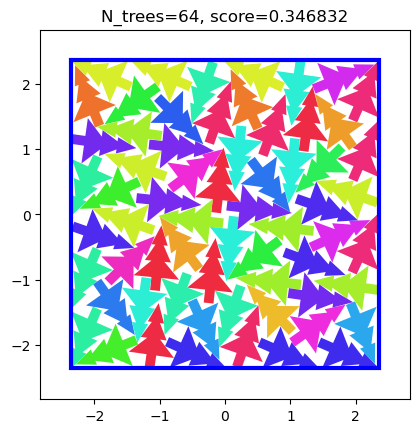

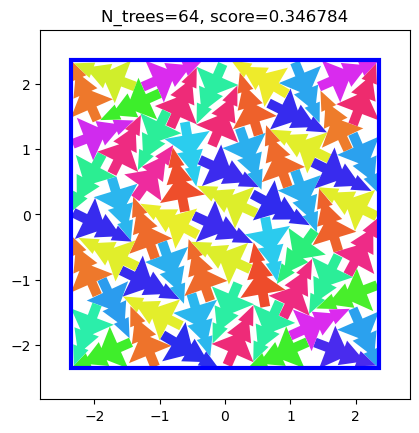

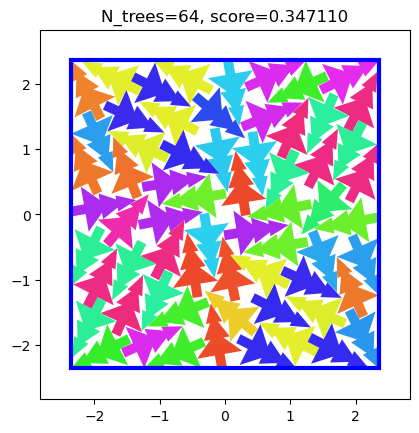

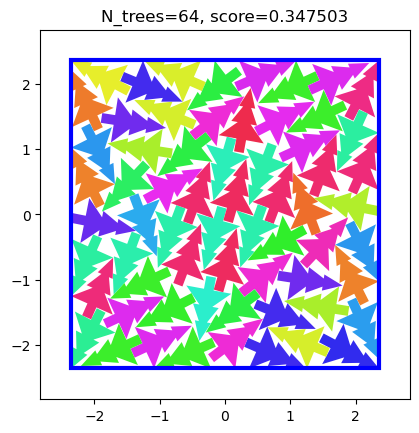

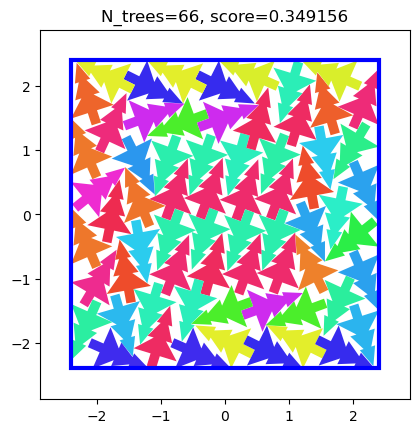

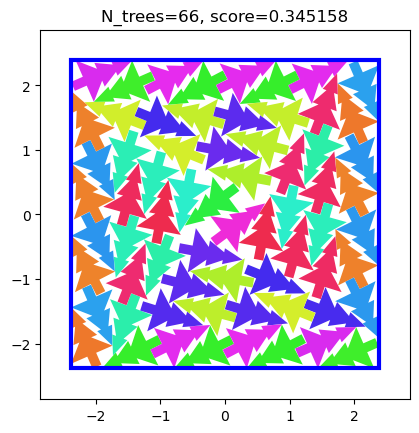

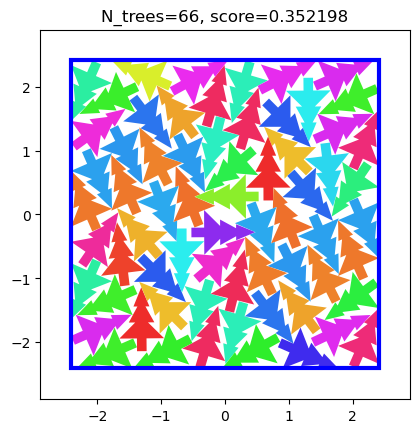

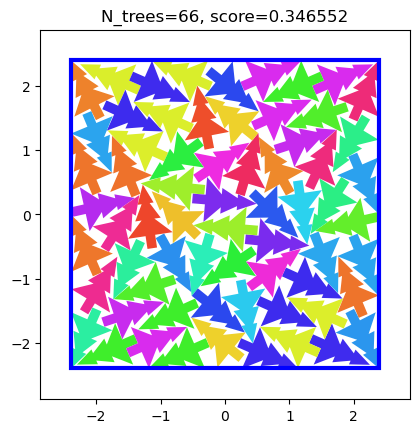

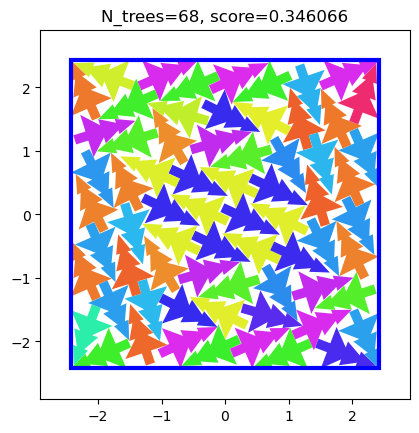

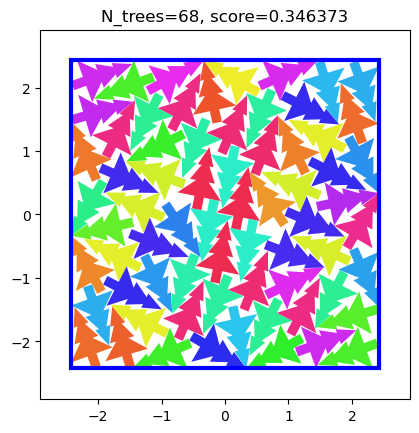

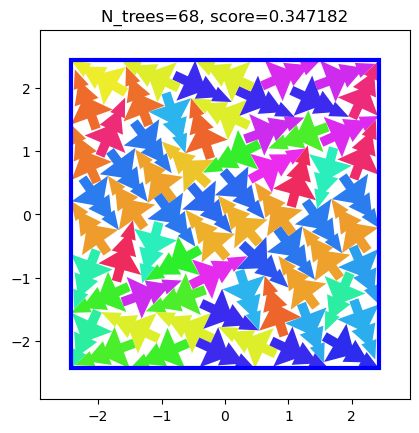

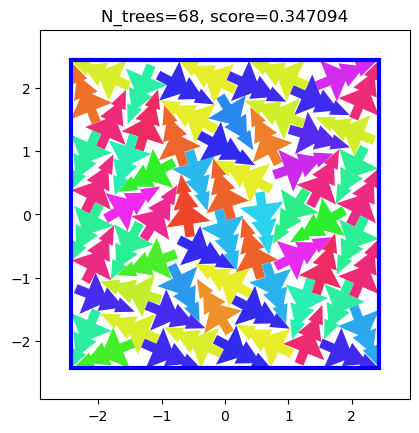

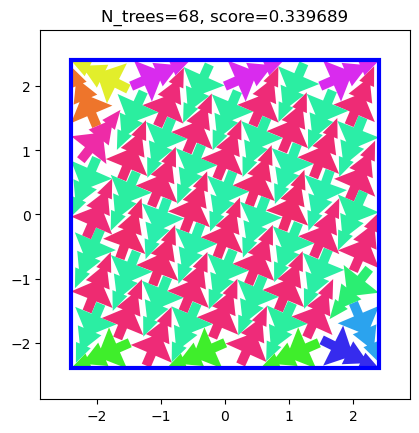

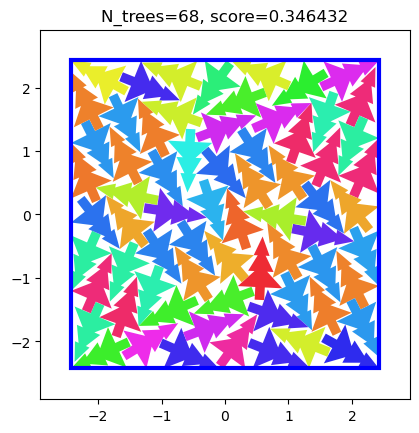

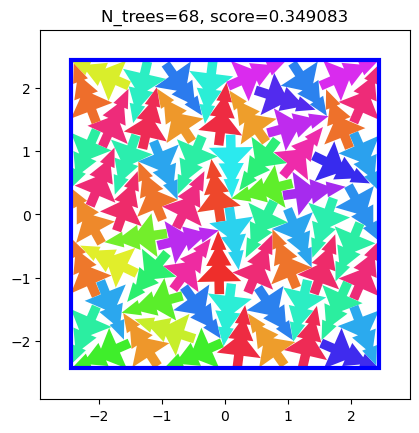

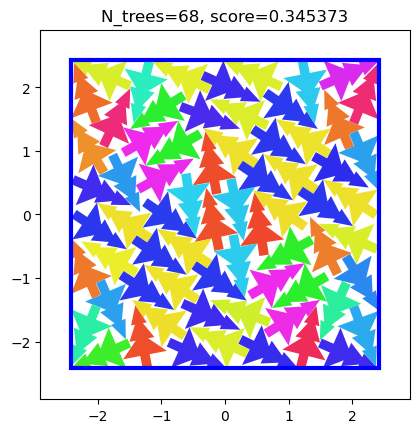

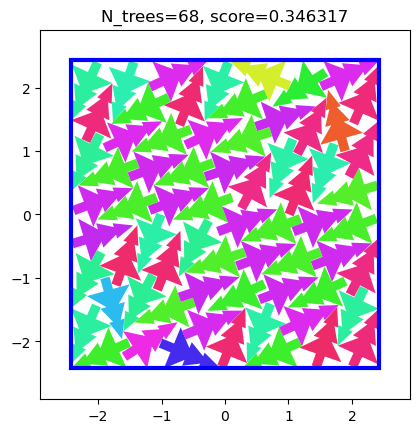

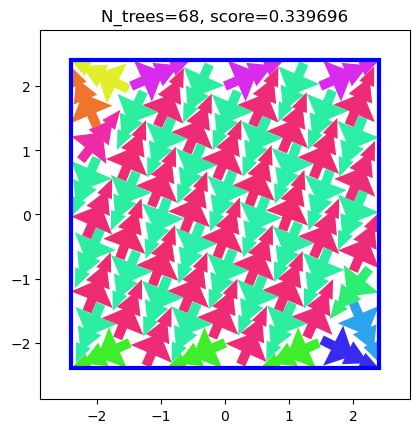

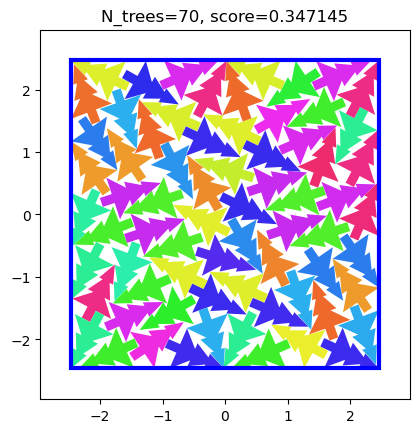

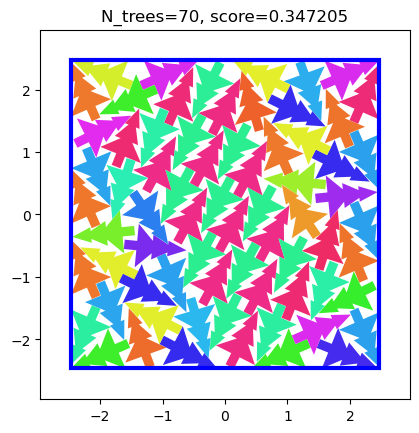

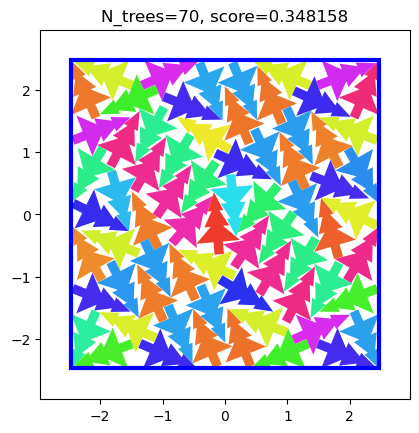

In [3]:
import numpy as np
import glob
for N_trees in np.arange(201):
    files = glob.glob(kgs.temp_dir + f'/extra/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>0:     
        #plt.figure()         
        for f in files:
            dat = kgs.dill_load(f)                  
            pack_vis_sol.pack_vis_sol(dat.ga.champions[0].phenotype)
            plt.title(f'N_trees={N_trees}, score={dat.ga.champions[0].phenotype.h[0,0]**2/N_trees:.6f}')